In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.datasets import mnist
import numpy as np

Using Theano backend.


In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
n_inputs = 28*28
n_hidden1 = 300
n_hidden2 = 150
n_hidden3 = n_hidden1
n_outputs = n_inputs

train_images = train_images.reshape(train_images.shape[0], 28*28)
train_images = train_images.astype('float32')/255
test_images.reshape(test_images.shape[0], 28*28)
test_images = test_images.astype('float32')/255

In [4]:
import time
class TimeHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, batch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, batch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)

In [5]:
ae = Sequential()
ae.add(Dense(n_hidden1, input_shape=(n_inputs,), activation='relu',name="first_encoding"))
ae.add(Dense(n_hidden2, activation='relu',name="the_code"))

# Decoder Layers
ae.add(Dense(n_hidden3, activation='relu',name="first_decoding"))
ae.add(Dense(n_outputs, activation='sigmoid',name="reconstruction"))

ae.summary()
time_callback = TimeHistory()
ae.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
first_encoding (Dense)       (None, 300)               235500    
_________________________________________________________________
the_code (Dense)             (None, 150)               45150     
_________________________________________________________________
first_decoding (Dense)       (None, 300)               45300     
_________________________________________________________________
reconstruction (Dense)       (None, 784)               235984    
Total params: 561,934
Trainable params: 561,934
Non-trainable params: 0
_________________________________________________________________


In [11]:
ae.fit(train_images, train_images,epochs=5, batch_size=128, callbacks=[time_callback])

Epoch 1/5
60000/60000 [==============================] - 4s 69us/step - loss: 0.0025 - acc: 0.0146
Epoch 2/5
60000/60000 [==============================] - 4s 69us/step - loss: 0.0025 - acc: 0.0142
Epoch 3/5
60000/60000 [==============================] - 4s 69us/step - loss: 0.0024 - acc: 0.0146
Epoch 4/5
60000/60000 [==============================] - 4s 69us/step - loss: 0.0024 - acc: 0.0147
Epoch 5/5
60000/60000 [==============================] - 4s 69us/step - loss: 0.0023 - acc: 0.0151


In [12]:
times = time_callback.times
print(times)

[4.1693949699401855, 4.135568141937256, 4.1545090675354, 4.14421010017395, 4.163434982299805]


In [13]:
output = ae.predict(train_images)

In [14]:
output[0][1:10]

array([1.1040913e-05, 1.5139583e-05, 2.1261485e-06, 1.1783408e-05,
       1.8172046e-06, 2.3080154e-06, 1.5855714e-05, 4.3105280e-07,
       1.2675035e-05], dtype=float32)

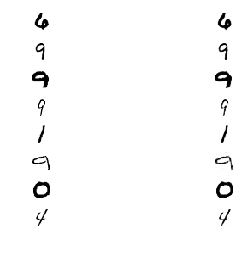

In [18]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

def plot_image(image, shape=[28,28]):
    plt.imshow(image.reshape(shape), cmap="Greys", interpolation="nearest")
    plt.axis("off")

rand_choice = np.random.choice(len(train_images), 8,replace=False)
for i in range(len(rand_choice)):
    plt.subplot(len(rand_choice),2,2*i+1)
    plot_image(train_images[rand_choice[i]])
    plt.subplot(len(rand_choice),2,2*i+2)
    plot_image(output[rand_choice[i]])